<a href="https://colab.research.google.com/github/harinadh01/Data-Analysis/blob/main/TASK_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving student-mat.csv to student-mat.csv


First 5 rows:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]

Missing values:
school        0
sex           0
age           0
address  

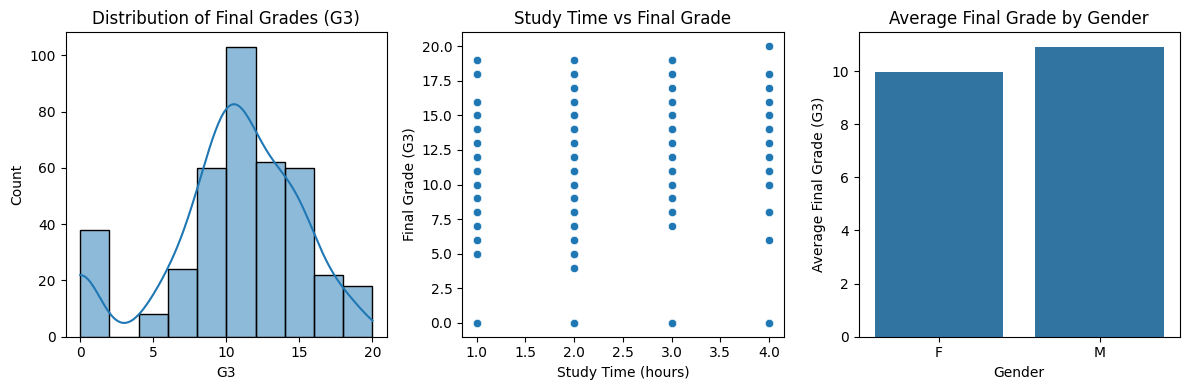

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "student-mat.csv"  # Ensure the file is in the working directory
df = pd.read_csv(file_path, delimiter=";")


# Display the first few rows
print("First 5 rows:")
print(df.head())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Display column data types
print("\nColumn data types:")
print(df.dtypes)

# Understand dataset size
print("\nDataset shape:")
print(df.shape)

# Handle missing values (if any)
df.fillna(df.select_dtypes(include=np.number).median(), inplace=True)


# Remove duplicate entries
df.drop_duplicates(inplace=True)

# Data Analysis Q1
average_g3 = df['G3'].mean()
print(f"\nAverage final grade (G3): {average_g3:.2f}")

# Data Analysis Q1
students_above_15 = df[df['G3'] > 15].shape[0]
print(f"Number of students scoring above 15: {students_above_15}")

# Data Analysis Q1
correlation = df[['studytime', 'G3']].corr().iloc[0, 1]
print(f"Correlation between study time and final grade (G3): {correlation:.2f}")

# Data Analysis Q1
avg_g3_gender = df.groupby('sex')['G3'].mean()
print("\nAverage final grade by gender:")
print(avg_g3_gender)

# Data Visualization
plt.figure(figsize=(12, 4))

# Histogram of final grades (G3)
plt.subplot(1, 3, 1)
sns.histplot(df['G3'], bins=10, kde=True)
plt.title("Distribution of Final Grades (G3)")

# Scatter plot: study time vs final grade
plt.subplot(1, 3, 2)
sns.scatterplot(x=df['studytime'], y=df['G3'])
plt.xlabel("Study Time (hours)")
plt.ylabel("Final Grade (G3)")
plt.title("Study Time vs Final Grade")

# Bar chart: average scores by gender
plt.subplot(1, 3, 3)
sns.barplot(x=avg_g3_gender.index, y=avg_g3_gender.values)
plt.xlabel("Gender")
plt.ylabel("Average Final Grade (G3)")
plt.title("Average Final Grade by Gender")

plt.tight_layout()
plt.show()